## Import all essential libraries required for data preprocessing, modeling, and interpretability in this experiment

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

## Load the data

In [6]:
df = pd.read_csv("breast_cancer.csv")

##  View the first 5 rows

In [7]:
df.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


## Check column types and null values

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

## Summary statistics for numerical columns

In [9]:
df.describe()

,Age,Unnamed: 3,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,0.0,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,NaN,30.473658,14.357107,4.158052,71.297962
std,8.963134,NaN,21.119696,8.099675,5.109331,22.921430
min,30.000000,NaN,1.000000,1.000000,1.000000,1.000000
25%,47.000000,NaN,16.000000,9.000000,1.000000,56.000000
50%,54.000000,NaN,25.000000,14.000000,2.000000,73.000000
75%,61.000000,NaN,38.000000,19.000000,5.000000,90.000000
max,69.000000,NaN,140.000000,61.000000,46.000000,107.000000


## Check for Missing Values

In [10]:
df.isnull().sum()

Age                          0
Race                         0
Marital Status               0
Unnamed: 3                4024
T Stage                      0
N Stage                      0
6th Stage                    0
Grade                        0
A Stage                      0
Tumor Size                   0
Estrogen Status              0
Progesterone Status          0
Regional Node Examined       0
Reginol Node Positive        0
Survival Months              0
Status                       0
dtype: int64

## Convert 'Survival Months' to numeric (if applicable)

In [11]:
df['Survival Months'] = pd.to_numeric(df['Survival Months'], errors='coerce')

## Drop rows with missing survival months

In [12]:
df.dropna(subset=['Survival Months'], inplace=True)

## Create binary target variable: survived >= 5 years or not

In [13]:
df['Survival_5yr'] = np.where(df['Survival Months'] >= 60, 1, 0)

In [14]:
df.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Survival_5yr
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive,0
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive,0
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead,0
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead,0
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead,0


## Drop original survival columns to avoid leakage and Strip whitespace in column names

In [15]:
df.drop(['Status', 'Survival Months'], axis=1, inplace=True)
df.columns = df.columns.str.strip()

## Identify categorical columns, One-hot encode categorical columns and  Define features and target

In [16]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_encoded.drop('Survival_5yr', axis=1)
y = df_encoded['Survival_5yr']

## Train-Test Split the dataset

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

##  Standardize Features 

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\yeman\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\yeman\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\yeman\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


## Train XGBoost, Predict and evaluate the dataset

In [19]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:20:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results:
              precision    recall  f1-score   support

           0       0.38      0.18      0.24       241
           1       0.71      0.88      0.79       564

    accuracy                           0.67       805
   macro avg       0.55      0.53      0.52       805
weighted avg       0.62      0.67      0.62       805

ROC-AUC: 0.5192534063152938


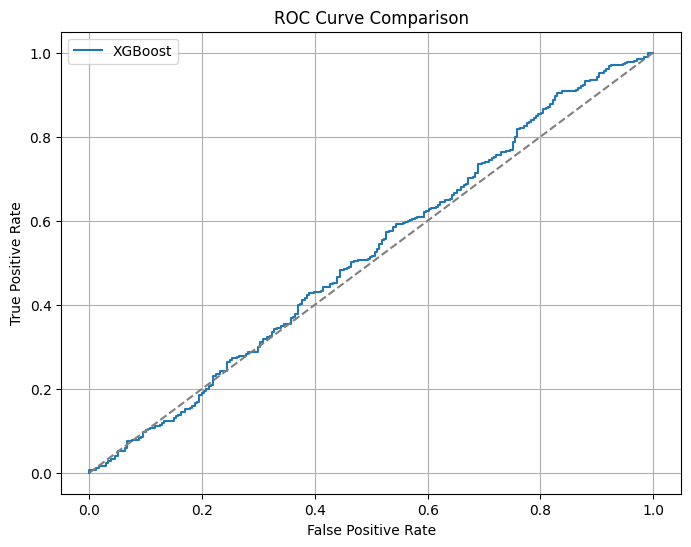

In [20]:
# Get ROC curve points

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

# Plot ROC Curves
plt.figure(figsize=(8, 6))

plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()